In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('/content/drive/MyDrive/7th sem Project/Final Vibration Data MULTI.csv')
def segment_data(data, segment_length=60):
    segments = []
    labels = []
    for i in range(4):  # Assuming data columns are ordered as Pump1, Pump2, Pump3, Pump4
        pump_data = data.iloc[:, i]
        for start_idx in range(0, len(pump_data) - segment_length + 1, segment_length):
            segment = pump_data[start_idx:start_idx + segment_length]
            segments.append(segment.values.reshape(-1, 1))
            labels.append(i)  # Label based on pump condition
    return np.array(segments), np.array(labels)

# Adjust segment_length if needed
segment_length = 60
segments, labels = segment_data(data, segment_length)
# Normalize the segments
scaler = StandardScaler()
segments_reshaped = segments.reshape(segments.shape[0], -1)  # Flatten to 2D for scaling
segments_scaled = scaler.fit_transform(segments_reshaped)
segments_scaled = segments_scaled.reshape(segments.shape)  # Reshape back to original

# Split the data
X_train, X_test, y_train, y_test = train_test_split(segments_scaled, labels, test_size=0.2, random_state=42)
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, num_classes=4)
y_test_categorical = to_categorical(y_test, num_classes=4)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(segment_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train_categorical, epochs=100, validation_split=0.2)
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
from numpy import argmax

# Generate predictions for the test set
predictions = model.predict(X_test)
predicted_classes = argmax(predictions, axis=1)
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For a nicer visualization of the confusion matrix
# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Bearing Fault', 'Impeller Fault', 'Both Faults'], yticklabels=['Healthy', 'Bearing Fault', 'Impeller Fault', 'Both Faults'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('/content/drive/MyDrive/7th sem Project/Final Vibration Data MULTI.csv')

In [ ]:
# Adjusting the plot for better visibility of all pumps by scaling the y-axis or normalizing data
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Normalizing data for better visualization
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

# Re-plotting the normalized vibration data with distinct colors and bold lines
plt.figure(figsize=(15, 7))
plt.plot(data_normalized['Pump1 vibration'], label='Pump 1 Vibration', color='blue', linewidth=2)
plt.plot(data_normalized['Pump2 Vibration'], label='Pump 2 Vibration', color='red', linewidth=2)
plt.plot(data_normalized['Pump3 Vibration'], label='Pump 3 Vibration', color='green', linewidth=2)
plt.plot(data_normalized['Pump4 vibration'], label='Pump 4 Vibration', color='orange', linewidth=2)
plt.title('Normalized Vibration Data of Four Pumps')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Vibration Reading')
plt.legend()
plt.show()


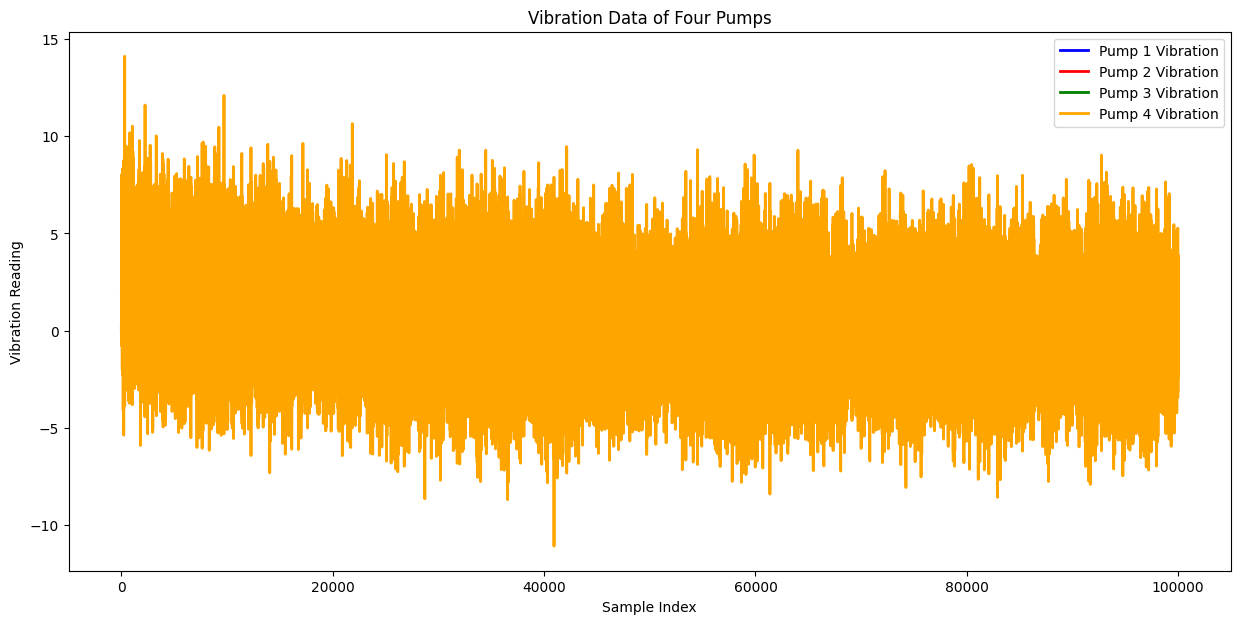

In [ ]:
# Re-plotting the vibration data with bold lines and distinct colors for clarity
plt.figure(figsize=(15, 7))
plt.plot(data['Pump1 vibration'], label='Pump 1 Vibration', color='blue', linewidth=2)
plt.plot(data['Pump2 Vibration'], label='Pump 2 Vibration', color='red', linewidth=2)
plt.plot(data['Pump3 Vibration'], label='Pump 3 Vibration', color='green', linewidth=2)
plt.plot(data['Pump4 vibration'], label='Pump 4 Vibration', color='orange', linewidth=2)
plt.title('Vibration Data of Four Pumps')
plt.xlabel('Sample Index')
plt.ylabel('Vibration Reading')
plt.legend()
plt.show()


In [ ]:
def segment_data(data, segment_length=60):
    segments = []
    labels = []
    for i in range(4):  # Assuming data columns are ordered as Pump1, Pump2, Pump3, Pump4
        pump_data = data.iloc[:, i]
        for start_idx in range(0, len(pump_data) - segment_length + 1, segment_length):
            segment = pump_data[start_idx:start_idx + segment_length]
            segments.append(segment.values.reshape(-1, 1))
            labels.append(i)  # Label based on pump condition
    return np.array(segments), np.array(labels)

# Adjust segment_length if needed
segment_length = 60
segments, labels = segment_data(data, segment_length)


In [ ]:
# Normalize the segments
scaler = StandardScaler()
segments_reshaped = segments.reshape(segments.shape[0], -1)  # Flatten to 2D for scaling
segments_scaled = scaler.fit_transform(segments_reshaped)
segments_scaled = segments_scaled.reshape(segments.shape)  # Reshape back to original

# Split the data
X_train, X_test, y_train, y_test = train_test_split(segments_scaled, labels, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, num_classes=4)
y_test_categorical = to_categorical(y_test, num_classes=4)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(segment_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 4)                 204       
                                                                 
Total params: 30804 (120.33 KB)
Trainable params: 30804 (120.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Layer, Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

    def get_config(self):
        return super(AttentionLayer, self).get_config()


In [ ]:
input_shape = (60, 1)  # Adjust based on your data's sequence length and features

input_layer = Input(shape=input_shape)
lstm_layer = LSTM(50, return_sequences=True)(input_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
attention_layer = AttentionLayer()(dropout_layer)
dense_layer = Dense(4, activation='softmax')(attention_layer)

model = Model(inputs=input_layer, outputs=dense_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 attention_layer (Attention  (None, 50)                110       
 Layer)                                                          
                                                                 
 dense_1 (Dense)             (None, 4)                 204       
                                                                 
Total params: 10714 (41.85 KB)
Trainable params: 10714 (41.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________

1/1 [==============================] - 1s 1s/step


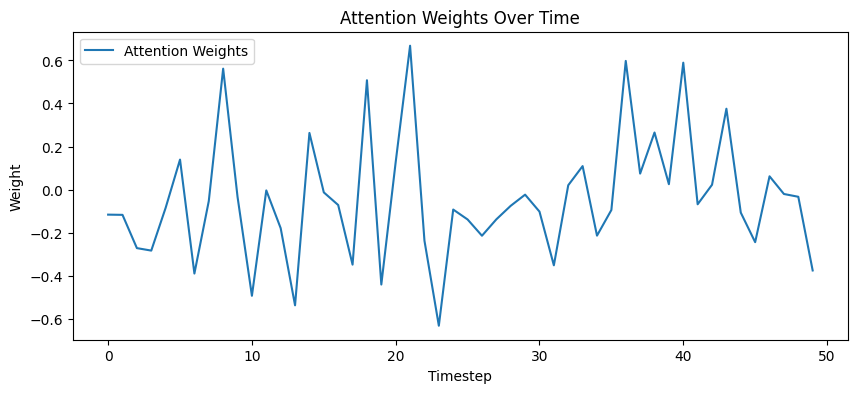

In [ ]:
# Assuming 'model' is your trained model that includes the custom AttentionLayer

# Correctly reference the 'attention_layer' when creating a new model for attention weights extraction
attention_model = Model(inputs=model.input, outputs=model.get_layer('attention_layer').output)

# Select a sample from your test set
test_sample = X_test[0:1]  # Ensure this sample is correctly preprocessed

# Predict attention weights for the selected test sample
attention_weights = attention_model.predict(test_sample)

# Plot the attention weights
plt.figure(figsize=(10, 4))
plt.plot(attention_weights[0], label='Attention Weights')  # Adjust indexing based on your data
plt.xlabel('Timestep')
plt.ylabel('Weight')
plt.title('Attention Weights Over Time')
plt.legend()
plt.show()


In [ ]:
history = model.fit(X_train, y_train_categorical, epochs=100, validation_split=0.2)


Epoch 1/100
134/134 [==============================] - 9s 40ms/step - loss: 0.9481 - accuracy: 0.4798 - val_loss: 0.8162 - val_accuracy: 0.4920
Epoch 2/100
134/134 [==============================] - 4s 29ms/step - loss: 0.8311 - accuracy: 0.4878 - val_loss: 0.8137 - val_accuracy: 0.5080
Epoch 3/100
134/134 [==============================] - 5s 37ms/step - loss: 0.8303 - accuracy: 0.4850 - val_loss: 0.8116 - val_accuracy: 0.4920
Epoch 4/100
134/134 [==============================] - 4s 32ms/step - loss: 0.8282 - accuracy: 0.4930 - val_loss: 0.8152 - val_accuracy: 0.4920
Epoch 5/100
134/134 [==============================] - 7s 50ms/step - loss: 0.8303 - accuracy: 0.4871 - val_loss: 0.8109 - val_accuracy: 0.5080
Epoch 6/100
134/134 [==============================] - 5s 40ms/step - loss: 0.8345 - accuracy: 0.5033 - val_loss: 0.8109 - val_accuracy: 0.4920
Epoch 7/100
134/134 [==============================] - 4s 29ms/step - loss: 0.8276 - accuracy: 0.5014 - val_loss: 0.8170 - val_accuracy:

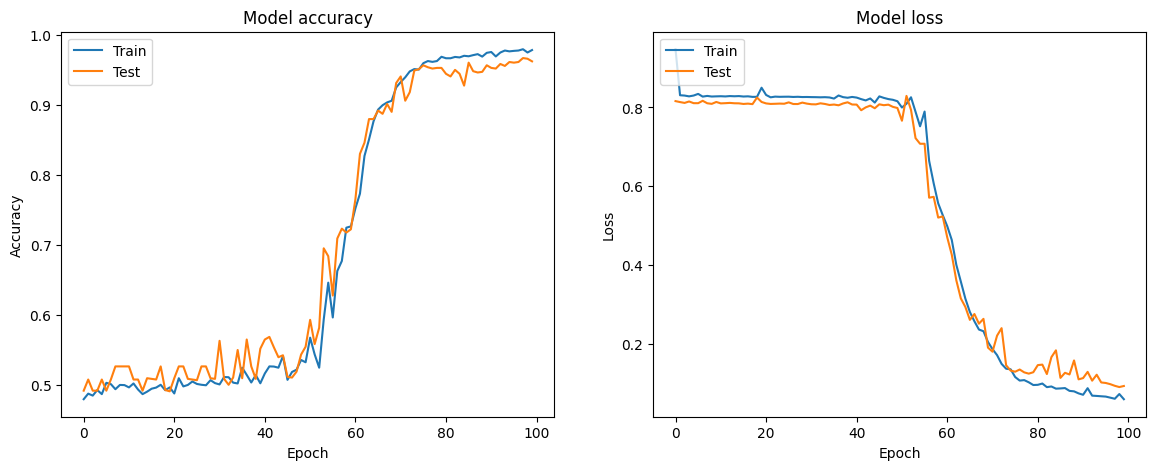

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


42/42 [==============================] - 1s 8ms/step


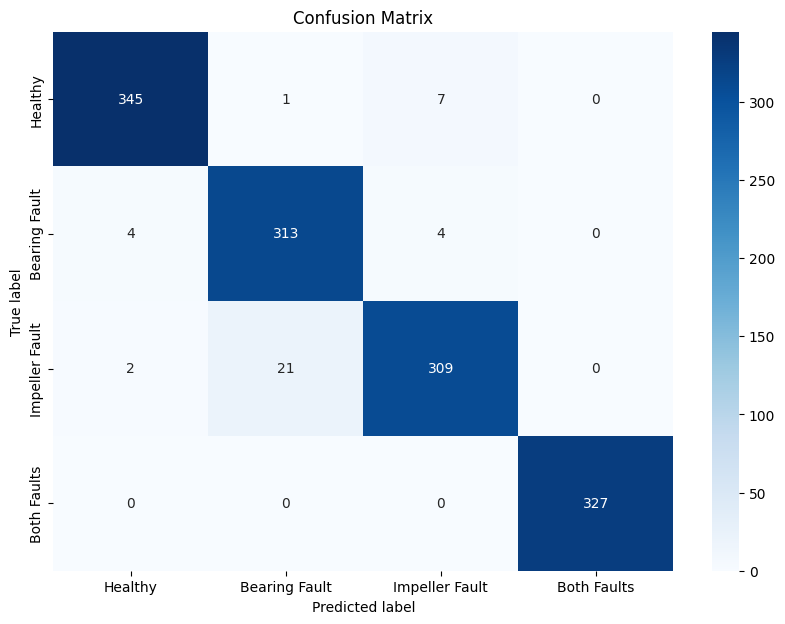

In [ ]:
from numpy import argmax

# Generate predictions for the test set
predictions = model.predict(X_test)
predicted_classes = argmax(predictions, axis=1)
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For a nicer visualization of the confusion matrix
# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Bearing Fault', 'Impeller Fault', 'Both Faults'], yticklabels=['Healthy', 'Bearing Fault', 'Impeller Fault', 'Both Faults'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, predicted_classes, target_names=['Healthy', 'Bearing Fault', 'Impeller Fault', 'Both Faults'])

print(report)


                precision    recall  f1-score   support

       Healthy       0.98      0.98      0.98       353
 Bearing Fault       0.93      0.98      0.95       321
Impeller Fault       0.97      0.93      0.95       332
   Both Faults       1.00      1.00      1.00       327

      accuracy                           0.97      1333
     macro avg       0.97      0.97      0.97      1333
  weighted avg       0.97      0.97      0.97      1333



In [ ]:
from tensorflow.keras.models import Model

# Assuming 'model' is your trained model
# And assuming the second LSTM layer is named 'lstm_2' as an example
layer_name = 'lstm_2'  # This should be the name of the layer you're interested in
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)


42/42 [==============================] - 2s 23ms/step


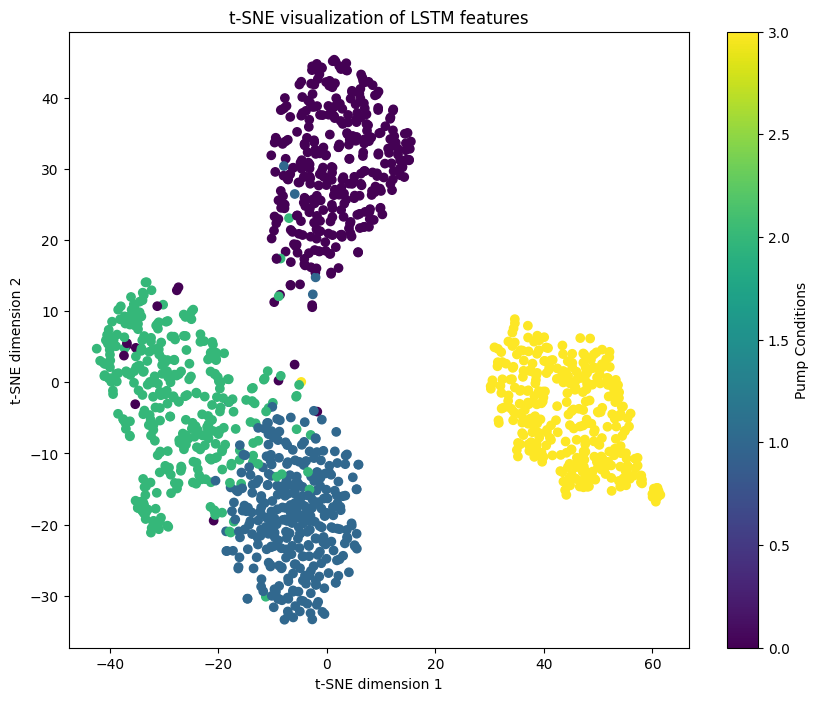

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Train your model here
# model.fit(X_train, y_train_categorical, ...)

# Create a new model to output the features from the last LSTM layer
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('lstm_2').output)

# Predict the intermediate features for the test set
intermediate_output = intermediate_layer_model.predict(X_test)

# Flatten the intermediate output for t-SNE
intermediate_output_flat = intermediate_output.reshape(intermediate_output.shape[0], -1)

# Run t-SNE on these features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(intermediate_output_flat)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE visualization of LSTM features')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.colorbar(scatter, label='Pump Conditions')
plt.show()



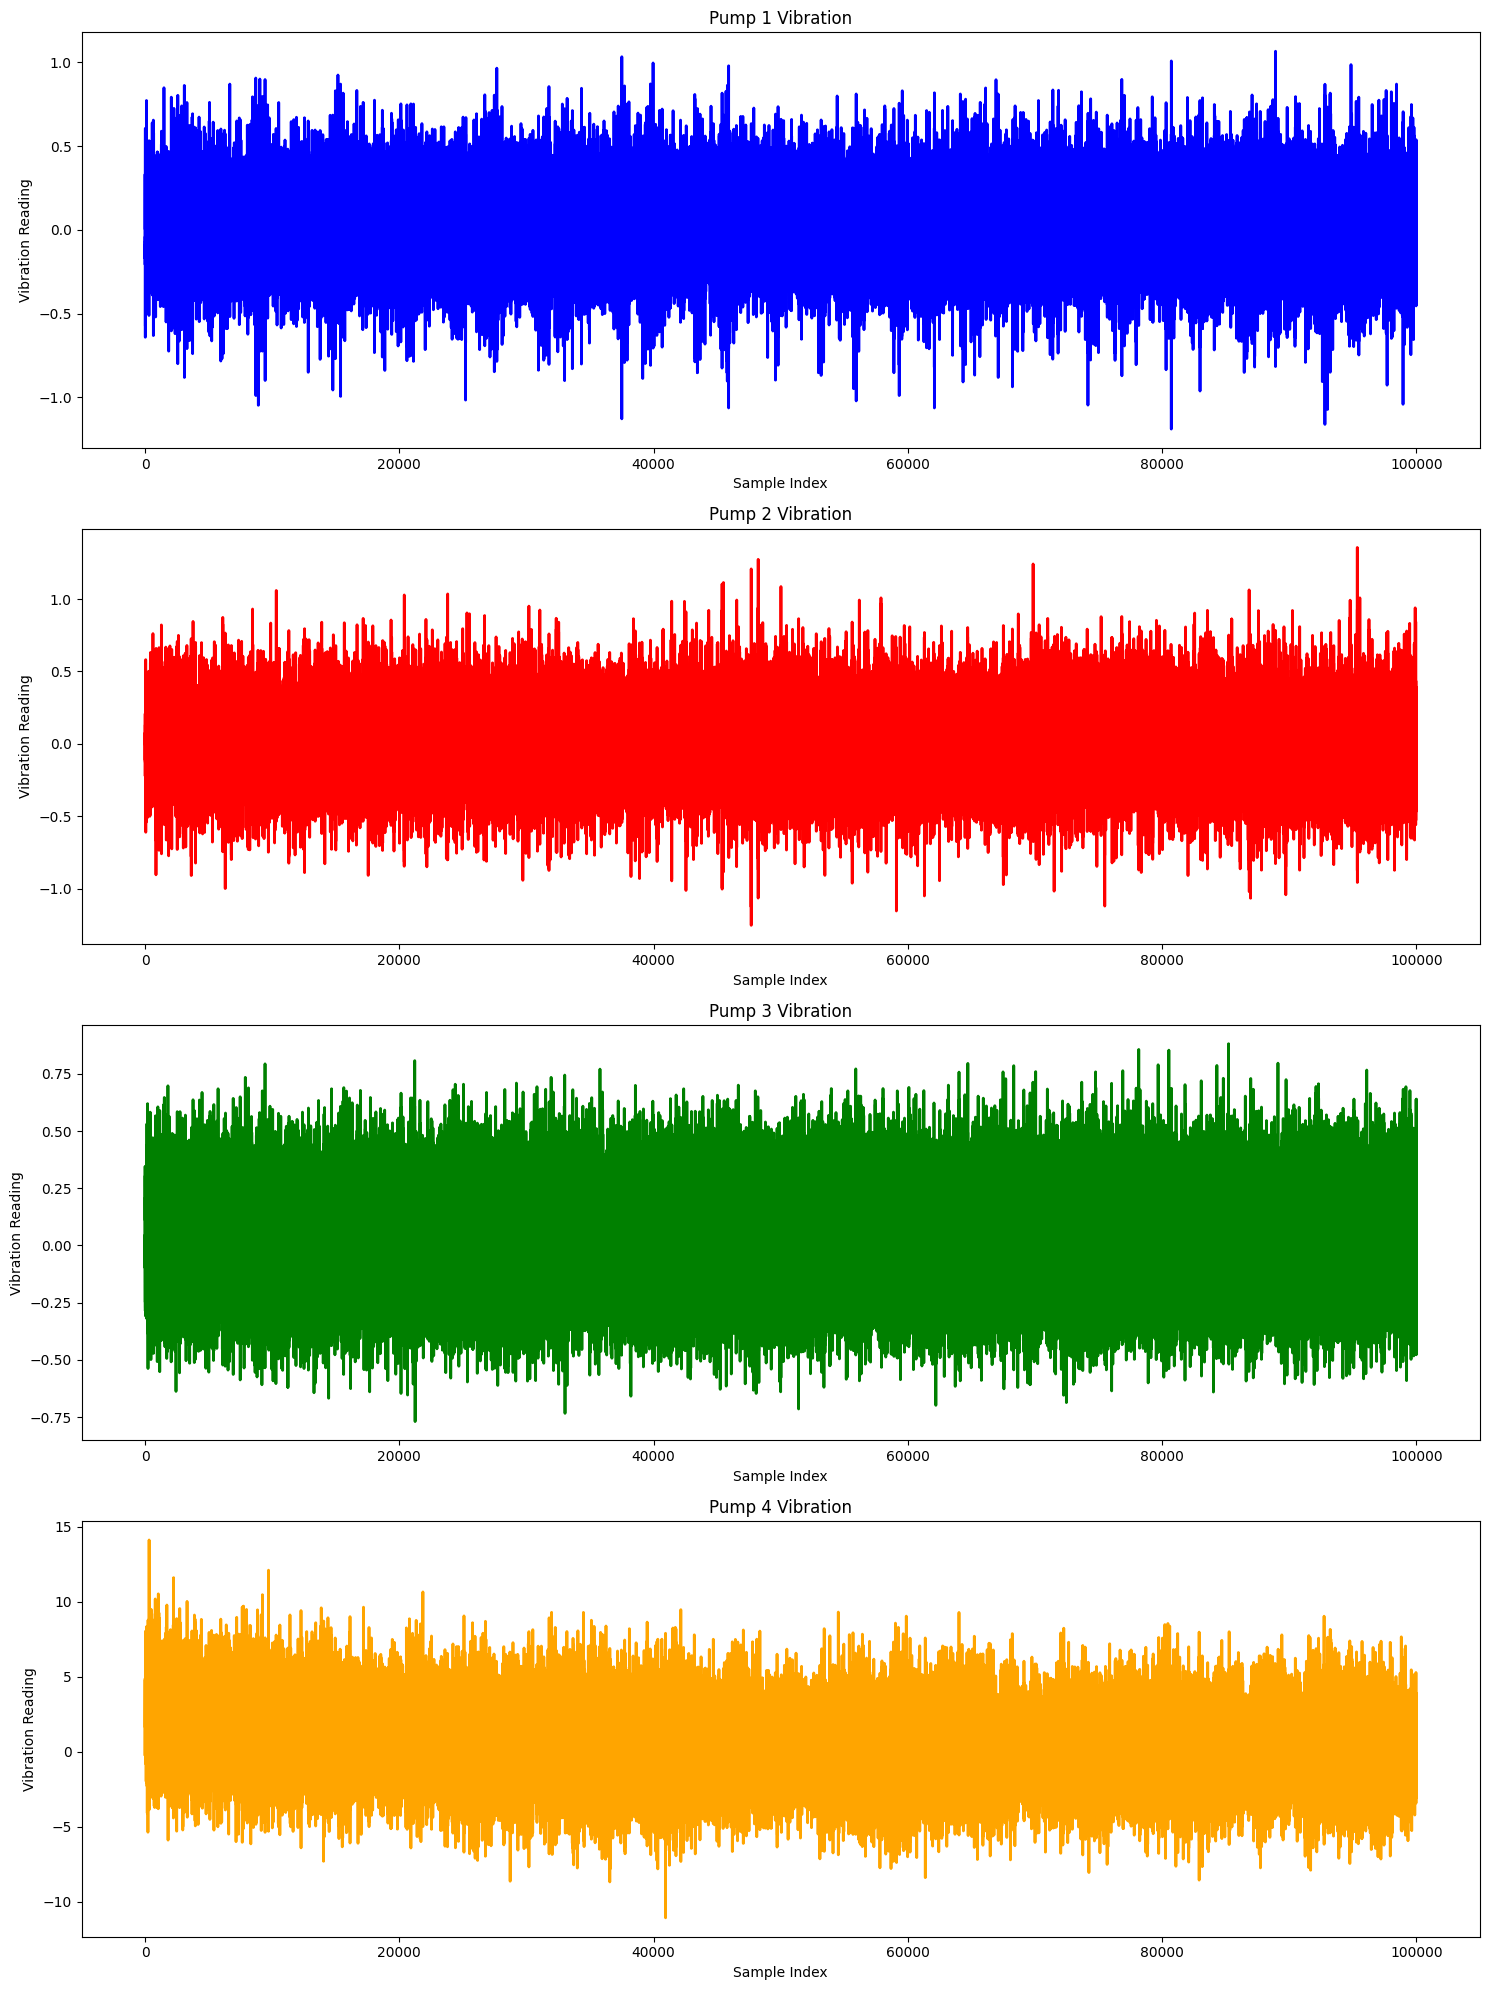

In [ ]:
# Plotting the raw vibration data for each pump separately for clearer visualization
fig, axs = plt.subplots(4, 1, figsize=(15, 20))

# Pump 1 Vibration
axs[0].plot(data['Pump1 vibration'], color='blue', linewidth=2)
axs[0].set_title('Pump 1 Vibration')
axs[0].set_xlabel('Sample Index')
axs[0].set_ylabel('Vibration Reading')

# Pump 2 Vibration
axs[1].plot(data['Pump2 Vibration'], color='red', linewidth=2)
axs[1].set_title('Pump 2 Vibration')
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('Vibration Reading')

# Pump 3 Vibration
axs[2].plot(data['Pump3 Vibration'], color='green', linewidth=2)
axs[2].set_title('Pump 3 Vibration')
axs[2].set_xlabel('Sample Index')
axs[2].set_ylabel('Vibration Reading')

# Pump 4 Vibration
axs[3].plot(data['Pump4 vibration'], color='orange', linewidth=2)
axs[3].set_title('Pump 4 Vibration')
axs[3].set_xlabel('Sample Index')
axs[3].set_ylabel('Vibration Reading')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

    def get_config(self):
        return super(AttentionLayer, self).get_config()
